## Задача 1

Лесник решил провести кластеризацию животных по их расположению в лесу. Он разделил карту на квадраты по километровым отметкам: первый квадрат можно описать 0 ≤ x ≤ 1, 0 ≤ y ≤ 1, второй — 1 ≤ x ≤ 2,0 ≤ y ≤ 1 и так далее.

Для файла А леснику нужно определить два соседних квадрата, в которых суммарно находится больше всего животных. Для файла Б леснику нужно определить три соседних квадрата. Квадраты называются соседними, если у них есть общая граница.

Для каждого файла вычислите два числа: S — количество социальных животных в выбранных соседних квадратах, и K — количество остальных животных в выбранных соседних квадратах. Животное называется социальным, если в радиусе 0.1 вокруг него находится как минимум 14 других животных.

В ответе запишите четыре числа: в первой строке S и K для файла А, во второй строке аналогичные данные для файла Б.

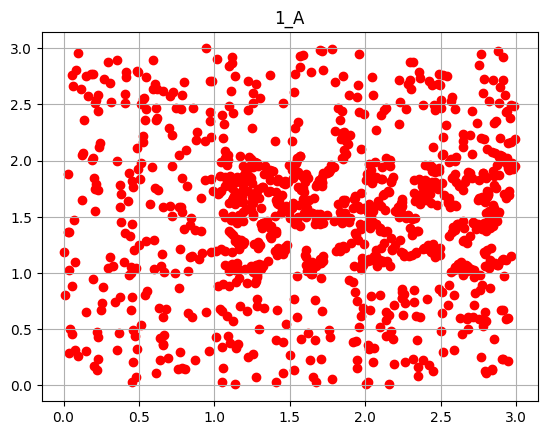

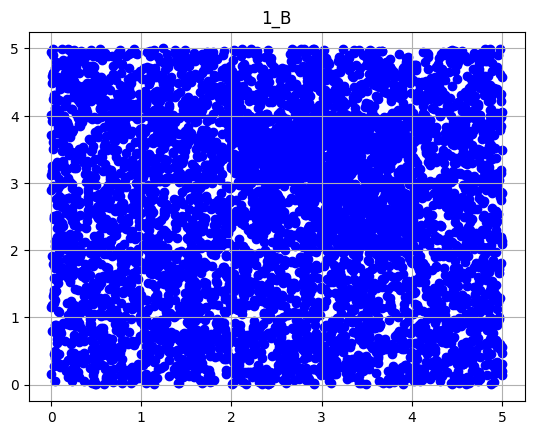

104 453
2156 158


In [16]:
import math
from collections import defaultdict
import matplotlib.pyplot as plt
import sys


def load_animals(filename):
    f = open(filename)
    return [tuple(map(float, line.strip().split())) for line in f]


def get_square(x, y):
    return int(x), int(y)


def build_grid(animals):
    grid = defaultdict(list)
    for idx, (x, y) in enumerate(animals):
        grid[get_square(x, y)].append(idx)
    return grid


def get_social(animals):
    n = len(animals)
    social = [False] * n
    for i in range(n):
        count = 0
        x0, y0 = animals[i]
        for j in range(n):
            if i == j:
                continue
            x, y = animals[j]
            if (x - x0) ** 2 + (y - y0) ** 2 <= 0.1 ** 2:
                count += 1
                if count == 14:
                    social[i] = True
                    break
    return social


def get_neighbors(x, y):
    return [(x + 1, y), (x - 1, y), (x, y + 1), (x, y - 1)]


def find_connected_pairs(grid):
    pairs = set()
    for square in grid:
        for neighbor in get_neighbors(*square):
            if neighbor in grid:
                pairs.add(tuple(sorted([square, neighbor])))
    return pairs


def find_connected_triples(grid):
    triples = set()
    squares = list(grid.keys())
    for a in squares:
        for b in get_neighbors(*a):
            if b not in grid:
                continue
            for c in get_neighbors(*b):
                if c not in grid or c == a:
                    continue
                triples.add(tuple(sorted([a, b, c])))
        neighbors = [x for x in get_neighbors(*a) if x in grid]
        for b in neighbors:
          for c in neighbors:
            if b == c: continue
            triples.add(tuple(sorted([a, b, c])))
    return triples


def count_s_k(group, grid, social_flags):
    indices = set()
    for square in group:
        indices.update(grid[square])
    S = sum(1 for idx in indices if social_flags[idx])
    K = len(indices) - S
    return S, K


def calc(filename, group_size):
    animals = load_animals(filename)
    social_flags = get_social(animals)
    grid = build_grid(animals)

    if group_size == 2:
        groups = find_connected_pairs(grid)
    else:
        groups = find_connected_triples(grid)

    max_s, max_k= 0, 0
    for group in groups:
        s, k = count_s_k(group, grid, social_flags)
        if s + k > max_s + max_k:
            max_s, max_k = s, k

    return max_s, max_k


def get_x_y(animals):
  x, y = [], []
  for (x0, y0) in animals:
    x.append(x0)
    y.append(y0)
  return x, y


x, y = get_x_y(load_animals("1_A.txt"))
plt.scatter(x, y, color="Red")
plt.title("1_A")
plt.grid()
plt.show()

x, y = get_x_y(load_animals("1_B.txt"))
plt.scatter(x, y, color="Blue")
plt.title("1_B")
plt.grid()
plt.show()

s1, k1 = calc("1_A.txt", 2)
s2, k2 = calc("1_B.txt", 3)
print(s1, k1)
print(s2, k2)


## Задача 2

Научно﻿-﻿исследовательский институт проводит мониторинг экологического состояния различных регионов. Результаты измерений представляются в виде пары чисел: первое — концентрация загрязняющего вещества в почве, второе — концентрация того же вещества в близлежащем водоёме. Для анализа результатов эта пара рассматривается как координаты точки на плоскости, и строится график с точками, которые соответствуют всем измерениям.

По ошибке данные нескольких исследуемых регионов были записаны в один файл. Известно, что измерения относятся к одному региону, если они образуют компактные группы точек на графике. Каждая группа лежит внутри прямоугольника высотой H и шириной.

Перед проведением основного анализа необходимо очистить данные от случайных выбросов при измерении. Для этого используется метод межквартильного размаха:
* для каждой группы точек вычисляется первый квартиль Q1 (значение, ниже которого находится 25% измерений) и третий квартиль Q3 (значение, выше которого находится 25% измерений) отдельно для рядов значений концентрации загрязняющего вещества в почве и в близлежащем водоёме (координаты X и Y)
* вычисляется межквартильный размах IQR - Q3 - Q1 для каждой кординаты
* точка считается выбросом, если хотя бы одна из её координат Х или Y выходит за пределы диапазона |Q1 - 1.5 * IQR; Q3 + 1.5 * IQR|

Для каждого региона необходимо рассчитать индекс экологической опасности I, который определяется как отношение среднего значения измерений к их количеству после удаления выбросов.

Под средним значением измерений в этом случае понимается среднее евклидово расстояние между всеми парами различных точек (измерений) в регионе.

В файле A хранятся данные о трёх регионах, где H=30, W=35. Каждая строка файла содержит два числа: координаты X (концентрация в почве) и Y (концентрация в водоёме), соответствующие одному измерению. Значения даны в условных единицах. Известно, что количество измерений не превышает 1000.

В файле B хранятся данные о пяти регионах, где H=40, W=32. Известно, что количество измерений не превышает 10000. Структура хранения информации в файле B аналогична файлу А.

Для каждого файла определите:
* общее количество выявленных выбросов
* регион с максимальным индексом экологической опасности

В ответе запишите четыре числа: в первой строке — общее количество выбросов и целую часть произведения I×100000 для файла A, во второй строке — аналогичные данные для файла B.

Расчёт квартилей
* Найдите медиану значений данных. Это второй квартиль Q2
* Найдите медиану значений данных, которые находятся ниже второго квартиля. Это первый квартиль Q1
* Найдите медиану значений данных, которые выше второго квартиля. Это третий квартиль Q3

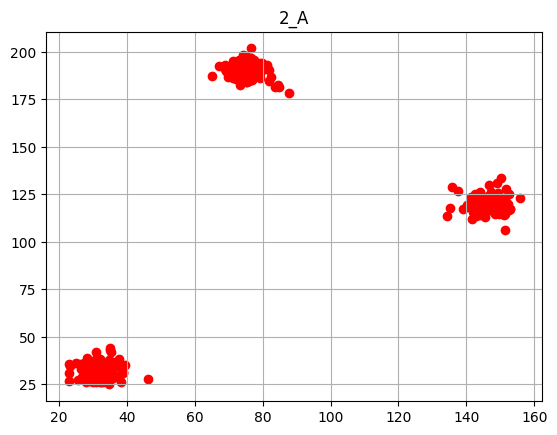

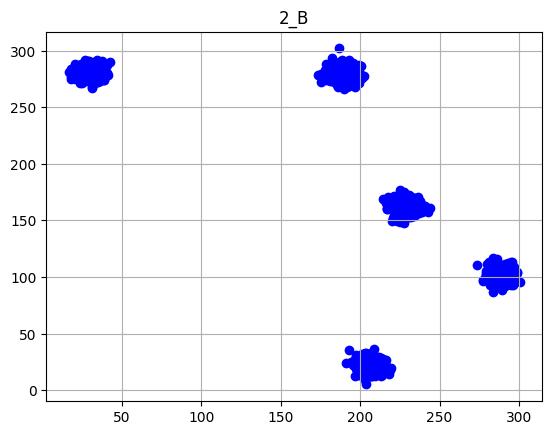

25 3804
467 189


In [34]:
import math
from collections import defaultdict
from itertools import combinations
import numpy as np


def load_points(filename):
    f = open(filename)
    return [tuple(map(float, line.strip().split())) for line in f]


def group_points(points, H, W):
    def dist(i, j):
        return math.hypot(points[i][0] - points[j][0], points[i][1] - points[j][1])

    max_dist = math.hypot(H, W)
    n = len(points)
    colors = [-1] * n
    cur_color = 0
    for i in range(n):
      if colors[i] != -1: continue
      for j in range(n):
        if dist(i, j) <= max_dist and colors[j] == -1:
          colors[j] = cur_color
      cur_color += 1
    regions = [[] for i in range(cur_color)]
    for i in range(n):
      regions[colors[i]].append(i)
    return regions


def calc_quartiles(arr):
    arr.sort()
    n = len(arr)
    def median(data):
        m = len(data)
        if m % 2 == 1:
            return data[m // 2]
        else:
            return (data[m // 2 - 1] + data[m // 2]) / 2

    Q2 = median(arr)
    lower_half = [x for x in arr if x < Q2]
    upper_half = [x for x in arr if x > Q2]
    Q1 = median(lower_half)
    Q3 = median(upper_half)
    return Q1, Q3


def remove_outliers(points):
    xs = [x for x, y in points]
    ys = [y for x, y in points]

    Q1_x, Q3_x = calc_quartiles(xs)
    Q1_y, Q3_y = calc_quartiles(ys)
    IQR_x = Q3_x - Q1_x
    IQR_y = Q3_y - Q1_y

    xmin, xmax = Q1_x - 1.5 * IQR_x, Q3_x + 1.5 * IQR_x
    ymin, ymax = Q1_y - 1.5 * IQR_y, Q3_y + 1.5 * IQR_y

    filtered = [(x, y) for x, y in points if xmin <= x <= xmax and ymin <= y <= ymax]
    outliers = len(points) - len(filtered)
    return filtered, outliers


def avg_pairwise_distance(points):
    if len(points) < 2:
        return 0.0
    total = 0.0
    n = len(points)
    for i in range(n):
        x1, y1 = points[i]
        for j in range(i+1, n):
            x2, y2 = points[j]
            total += math.hypot(x1 - x2, y1 - y2)
    return total / (n * (n - 1) / 2)


def process(filename, H, W):
    points = load_points(filename)
    groups = group_points(points, H, W)

    max_index = 0.0
    total_outliers = 0

    for group_inds in groups:
        group = []
        for i in group_inds:
          group.append(points[i])
        clear_group, outliers = remove_outliers(group)
        total_outliers += outliers
        group = clear_group
        n = len(group)
        if n == 0:
            continue
        avg_dist = avg_pairwise_distance(group)
        index = avg_dist / n
        max_index = max(max_index, index)

    return total_outliers, int(max_index * 100000)


x, y = get_x_y(load_animals("2_A.txt"))
plt.scatter(x, y, color="Red")
plt.title("2_A")
plt.grid()
plt.show()

x, y = get_x_y(load_animals("2_B.txt"))
plt.scatter(x, y, color="Blue")
plt.title("2_B")
plt.grid()
plt.show()

out_a, max_i_a = process("2_A.txt", H=30, W=35)
out_b, max_i_b = process("2_B.txt", H=40, W=32)
print(out_a, max_i_a)
print(out_b, max_i_b)

## Задача 3

Кластеризуйте как в предыдущих домашках. Будем называть центром кластера точку этого кластера, сумма расстояний от которой до всех остальных точек кластера минимальна.

Для каждого файла определите координаты центра каждого кластера, затем вычислите два числа: A - среднее арифметическое абсцисс центров кластеров, и среднее B - арифметическое ординат центров кластеров. В ответе запишите четыре числа: в первой строке сначала целую часть произведения A\*10000 затем целую часть произведения B\*10000 для файла А, во второй строке — аналогичные данные для файла Б.


## Задача 4

Исследователь анализирует набор объектов, каждый из которых характеризуется пятью числовыми параметрами. Он знает, что объекты образуют несколько групп (кластеров), которые можно выявить при проекции на плоскость только двух параметров из пяти. Значения в одном из столбцов будут соответствовать координатам по оси абсцисс, а из второго — координатам по оси ординат. Каждый кластер можно заключить в квадратную область заданного размера L, причём эти квадраты между собой не пересекаются. Стороны квадратов параллельны координатным осям. Каждый объект должен принадлежать только одному кластеру.

Евклидово расстояние

В файле A хранятся данные о наборе объектов, образующих три кластера. В каждой строке через пробел записаны пять параметров, характеризующих один объект. Все значения представлены с точностью до двух знаков после запятой. Количество объектов в файле А не превышает 1000.

В файле Б записаны данные о наборе объектов, образующих шесть кластеров, с аналогичной структурой хранения информации. Количество объектов в файле Б не превышает 10000.

Для каждого файла необходимо определить, какая пара параметров позволяет разделить объекты на кластеры, и найти минимальный размер стороны квадрата L, который может содержать все точки одного кластера при проекции на плоскость найденных параметров. Также определите в каждом кластере расстояние между двумя объектами, расположенными дальше всего друг от друга, и вычислите P — среднее арифметическое таких расстояний для всех кластеров.

В ответе запишите четыре числа: в первой строке — целую часть произведения L×10000, затем целую часть произведения P×10000 для файла А, во второй строке — аналогичные значения для файла Б.

In [ ]:
## Задача 5